# 1. Install and Import Dependencies

In [1]:
!pip install torch==1.8.1 torchvision==0.9.1 torchaudio==0.8.1

  Using cached torch-1.8.1-cp39-none-macosx_10_9_x86_64.whl (119.6 MB)
  Using cached torchvision-0.9.1-cp39-cp39-macosx_10_9_x86_64.whl (13.1 MB)
  Using cached torchaudio-0.8.1-cp39-cp39-macosx_10_9_x86_64.whl (1.5 MB)
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
  Using cached numpy-1.22.3-cp39-cp39-macosx_10_14_x86_64.whl (17.6 MB)
  Using cached Pillow-9.0.1-cp39-cp39-macosx_10_10_x86_64.whl (3.0 MB)


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11525, done.
remote: Total 11525 (delta 0), reused 0 (delta 0), pack-reused 11525
Receiving objects: 100% (11525/11525), 11.32 MiB | 3.33 MiB/s, done.
Resolving deltas: 100% (7966/7966), done.


In [2]:
!cd yolov5 && pip install -r requirements.txt

  Using cached matplotlib-3.5.1-cp39-cp39-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached opencv_python-4.5.5.64-cp36-abi3-macosx_10_15_x86_64.whl (46.3 MB)
  Using cached PyYAML-6.0-cp39-cp39-macosx_10_9_x86_64.whl (197 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached scipy-1.8.0-cp39-cp39-macosx_12_0_universal2.macosx_10_9_x86_64.whl (55.6 MB)
  Using cached tqdm-4.63.0-py2.py3-none-any.whl (76 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached pandas-1.4.1-cp39-cp39-macosx_10_9_x86_64.whl (11.5 MB)
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached thop-0.0.31.post2005241907-py3-none-any.whl (8.7 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.31.1-py3-none-any.whl (899 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached kiwisolver-1.4.0-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
  Using cached u

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

/Users/jonathanli/Dev/YOLO-Package-Detection/ypd/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/jonathanli/.cache/torch/hub/ultralytics_yolov5_master
fatal: not a git repository (or any of the parent directories): .git
YOLOv5 🚀 2022-3-21 torch 1.8.1 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [15]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

--2022-03-20 18:30:08--  https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138573 (135K) [image/jpeg]
Saving to: ‘800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg’

800px-Cars_in_traff 100%[===================>] 135.33K  --.-KB/s    in 0.09s   

2022-03-20 18:30:09 (1.44 MB/s) - ‘800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg’ saved [138573/138573]



In [4]:
img = '800px-Cars_in_traffic_in_Auckland,_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 26.0ms pre-process, 251.2ms inference, 3.3ms NMS per image at shape (1, 3, 448, 640)


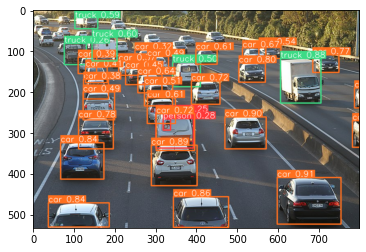

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

# 4. Real Time Detections

In [10]:
# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()
    
#     # Make detections 
#     results = model(frame)
    
#     cv2.imshow('YOLO', np.squeeze(results.render()))
    
#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

# 5. Train from scratch

In [7]:
import uuid   # Unique identifier
import os
import time

In [12]:
!mkdir -p data/images
!mkdir -p data/labels

In [13]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['package']
number_imgs = 5

In [29]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [24]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/package.d42a93d4-a8b6-11ec-8bcb-34363b16023a.jpg


In [26]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/package.1b8463ea-a8b7-11ec-8bcb-34363b16023a.jpg
data/images/package.1b846a70-a8b7-11ec-8bcb-34363b16023a.jpg
data/images/package.1b846ca0-a8b7-11ec-8bcb-34363b16023a.jpg
data/images/package.1b846e94-a8b7-11ec-8bcb-34363b16023a.jpg
data/images/package.1b84707e-a8b7-11ec-8bcb-34363b16023a.jpg


In [30]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 1975, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 1975 (delta 115), reused 134 (delta 62), pack-reused 1761
Receiving objects: 100% (1975/1975), 232.85 MiB | 1.77 MiB/s, done.
Resolving deltas: 100% (1162/1162), done.


In [14]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

  Using cached PyQt5-5.15.6-cp36-abi3-macosx_10_13_x86_64.whl (7.0 MB)
  Using cached lxml-4.8.0-cp39-cp39-macosx_10_15_x86_64.whl (4.6 MB)
  Using cached PyQt5_sip-12.9.1-cp39-cp39-macosx_10_9_x86_64.whl (83 kB)
  Using cached PyQt5_Qt5-5.15.2-py3-none-macosx_10_13_intel.whl (40.5 MB)


In [35]:
!cd labelImg && python3 labelImg.py

Image:/Users/jonathanli/Desktop/train/IMG_6817_jpg.rf.126874422a2e4c8d3b78bbeddea58455.jpg -> Annotation:/Users/jonathanli/Dev/Xilinx Package Detection/YOLO-Package-Detection/data/labels/IMG_6817_jpg.rf.126874422a2e4c8d3b78bbeddea58455.txt


In [19]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-51-g9cd89b7 torch 1.8.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, f


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    35/499        0G   0.06334   0.02002         0        17       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5      0.995        0.8      0.895      0.159

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    36/499        0G   0.06595   0.01633         0        15       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5      0.995        0.8      0.895      0.159

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    37/499        0G   0.06509   0.01911         0        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1        0.4      0.583      0.134

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    86/499        0G   0.03709   0.01571         0        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1      0.999      0.995      0.603

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    87/499        0G    0.0394   0.01536         0        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5        0.8      0.799       0.88      0.352

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    88/499        0G   0.03762   0.01645         0        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5        0.8      0.799       0.88      0.352

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   137/499        0G   0.03409  0.009943         0        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.544

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   138/499        0G   0.03752   0.01015         0        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.544

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   139/499        0G   0.03503   0.01261         0        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.731

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   188/499        0G   0.02886   0.01033         0        27       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995       0.72

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   189/499        0G   0.03014  0.009842         0        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.728

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   190/499        0G   0.02558  0.008751         0        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.728

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   239/499        0G   0.02998   0.00835         0        26       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.865

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   240/499        0G   0.02216  0.009652         0        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.865

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   241/499        0G   0.02192  0.007193         0        18       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.806

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   290/499        0G   0.01784   0.00623         0        16       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.864

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   291/499        0G   0.01731  0.007596         0        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.929

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   292/499        0G     0.019  0.006275         0        17       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.929

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   341/499        0G   0.01493  0.007789         0        25       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.895

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   342/499        0G   0.01486  0.006322         0        13       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.895

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   343/499        0G    0.0153  0.006457         0        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.814

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   392/499        0G   0.01273  0.005402         0        21       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995       0.94

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   393/499        0G   0.01339  0.006947         0        25       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.975

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   394/499        0G   0.01376   0.00704         0        30       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.975

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   443/499        0G   0.01142  0.005942         0        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.959

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   444/499        0G   0.01225   0.00656         0        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.959

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   445/499        0G   0.01111  0.005111         0        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.941

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   494/499        0G  0.009766  0.006123         0        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.995

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   495/499        0G  0.009342  0.005583         0        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.995

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   496/499        0G   0.01061    0.0059         0        22       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          5          5          1          1      0.995      0.995

     Epoch   gpu_mem       box      

# 6. Load Custom Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/jonathanli/.cache/torch/hub/master.zip
fatal: not a git repository (or any of the parent directories): .git
YOLOv5 🚀 2022-3-22 torch 1.8.1 CPU

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [9]:
# img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')
img = os.path.join('data','val','images','package.47720b24-6901-11ec-80a1-84ad8d5ec72a.jpg')

In [10]:
results = model(img)

In [11]:
results.print()

image 1/1: 720x1280 1 package
Speed: 28.5ms pre-process, 203.1ms inference, 1.3ms NMS per image at shape (1, 3, 384, 640)


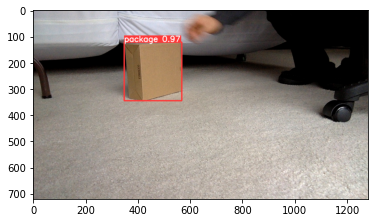

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()